# Text Classification - Movie Reviews Sentiment Analysis

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/


# Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Check to see if there are any missing values in the dataframe.**

In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Remove any reviews that are NaN**

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

## Important point for dealing Text data

+ **Check to see if any reviews are blank strings and not just NaN.** 

+ **Note: This means a review text could just be: "" or "  " or some other larger blank string. How can we check it?**
+ [Resources](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)

In [15]:
df['review'].str.isspace().sum()

27

In [16]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


## using `~` to get the opposite of the conditions

In [17]:
df[~df['review'].str.isspace()] # now get get the items which are not spaces

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [18]:
df = df[~df['review'].str.isspace()]

### check if there is any empty string

In [20]:

df[df['review'].apply(lambda review: review == '')]

,label,review


In [21]:
df.isnull().sum()

label     0
review    0
dtype: int64

**Check value counts per label:**

In [22]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

--------

# EDA on Bag of Words

+ **using CountVectorizer model to get the top 20 words (that are not english stop words) per label type**
+ [Resources](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
count_vectorizer = CountVectorizer(stop_words='english')

### Positive Ones

In [51]:
pos_sparse_matrix = count_vectorizer.fit_transform(df[df['label'] == 'pos']['review'])

In [52]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '0009f',
 '007',
 '05',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '105',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '1138',
 '118',
 '12',
 '121',
 '122',
 '1272',
 '129',
 '1298',
 '12th',
 '13',
 '130',
 '1305',
 '135',
 '137',
 '139',
 '13th',
 '14',
 '143',
 '144',
 '14th',
 '15',
 '150',
 '1500s',
 '150th',
 '151',
 '152',
 '153',
 '155',
 '1554',
 '1583',
 '1590',
 '15th',
 '16',
 '160',
 '1600',
 '161',
 '165',
 '167',
 '16mm',
 '16th',
 '16x9',
 '17',
 '170',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '1799',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1888',
 '1899',
 '18th',
 '19',
 '1900',
 '1908',
 '1912',
 '1914',
 '1919',
 '1920s',
 '1922',
 '1930',
 '1930s',
 '1932',
 '1934',
 '1935',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1950s',
 '1951',
 '1953',
 '1954',
 '1955',
 '1957',
 '195

In [53]:
pos_sparse_matrix.sum(axis=0).tolist()[0]

[2,
 55,
 1,
 7,
 1,
 183,
 38,
 4,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 3,
 14,
 3,
 1,
 1,
 1,
 1,
 29,
 1,
 1,
 1,
 2,
 1,
 1,
 44,
 3,
 1,
 1,
 7,
 1,
 5,
 16,
 1,
 1,
 4,
 35,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 16,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 41,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 16,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 12,
 3,
 1,
 7,
 2,
 2,
 1,
 1,
 3,
 5,
 2,
 1,
 2,
 3,
 2,
 3,
 7,
 3,
 2,
 3,
 2,
 2,
 1,
 5,
 1,
 1,
 10,
 8,
 1,
 2,
 2,
 1,
 5,
 3,
 3,
 14,
 22,
 6,
 4,
 4,
 2,
 1,
 8,
 5,
 9,
 9,
 26,
 10,
 8,
 12,
 5,
 8,
 3,
 14,
 7,
 10,
 12,
 15,
 6,
 1,
 5,
 15,
 10,
 10,
 11,
 11,
 8,
 15,
 13,
 14,
 17,
 22,
 23,
 32,
 39,
 67,
 65,
 1,
 59,
 17,
 3,
 42,
 11,
 24,
 26,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 15,
 10,
 1,
 1,
 6,
 12,
 1,
 5,
 11,
 2,
 1,
 2,
 22,
 2,
 3,
 4,
 1,
 6,
 4,
 1,
 1,
 1,
 6,
 1,
 4,
 2,
 41,
 8,
 1,
 1,
 7,
 1,
 1,
 6,
 1,
 1,
 2,
 12,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 5,
 4,
 25,
 1,
 5,
 3,
 4,
 1,
 1,


In [54]:
pos_freqs = zip(count_vectorizer.get_feature_names(), pos_sparse_matrix.sum(axis=0).tolist()[0])

# sort from largest to smallest
print('Top 20 words used for Positive reviews.')
print(sorted(pos_freqs, key=lambda x:-x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Negative Ones

In [75]:
count_vectorizer = CountVectorizer(stop_words='english')

neg_sparse_matrix = count_vectorizer.fit_transform(df[df['label'] == 'neg']['review'])

In [76]:
neg_freqs = zip(count_vectorizer.get_feature_names(), neg_sparse_matrix.sum(axis=0).tolist()[0])

In [77]:
print('Top 20 words used for Negative reviews.')
print(sorted(neg_freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


------

# Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=101)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1550,), (388,), (1550,), (388,))

-----

# Training Model

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [91]:
params ={
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [3, 4],
}

In [94]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('grid_cv', GridSearchCV(SVC(), params, cv=5, verbose=1)),
])

In [95]:
pipe.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 10.9min finished


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('grid_cv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.01, 0.1, 1], 'degree': [3, 4],
                                          'kernel': ['linear', 'poly', 'rbf']},
                              verbose=1))])

# Model Evaluation

In [100]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [101]:
preds = pipe.predict(X_test)

In [102]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.81      0.84      0.83       191
         pos       0.84      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



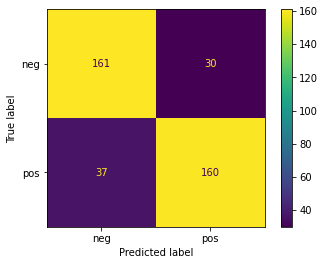

In [103]:
plot_confusion_matrix(pipe, X_test, y_test);

--------

# linearSVC

In [106]:
from sklearn.svm import LinearSVC

In [107]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC())
])

In [108]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [109]:
preds = pipe.predict(X_test)

In [110]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



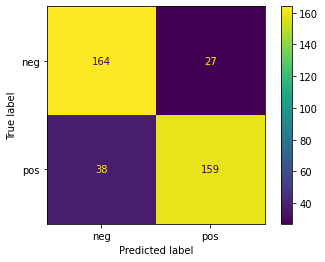

In [111]:
plot_confusion_matrix(pipe, X_test, y_test);